# Read and plot skewer outputs from CoLoRe

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
#Open data file (test file with few quasars)
hdulist = fits.open('../example_data/raw_colore/test_N1000.fits')
hdulist.info()

Filename: ../example_data/raw_colore/test_N1000.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   ()      
  1  CATALOG     BinTableHDU     24   1000R x 5C   [1J, 1E, 1E, 1E, 1E]   
  2  DENSITY SKEWERS  ImageHDU         8   (2048, 1000)   float32   
  3  VELOCITY SKEWERS  ImageHDU         8   (2048, 1000)   float32   
  4              BinTableHDU     21   2048R x 4C   [1E, 1E, 1E, 1E]   


In [4]:
# get information about quasars (TYPE,RA,DEC,Z_COSMO,DZ_RSD)
catalog = hdulist[1].data
z_qso = catalog['Z_COSMO']
Nq = len(z_qso)
print('# quasars =',Nq)
print(np.min(z_qso),'< z_qso <',np.max(z_qso))

# quasars = 1000
0.19643 < z_qso < 3.74638


In [5]:
# get arraw with redshift in each cell of grid
z = hdulist[4].data['Z']
Nz=len(z)
print('# cells in grid =',Nz)
print(z[0],'< z <',z[-1])

# cells in grid = 2048
0.000400246 < z < 3.78768


In [6]:
# Get deltas (fluctuation around mean density) and line of sight velocity (actually, dz)
deltas = hdulist[2].data
velocities = hdulist[3].data
print(deltas.shape)

(1000, 2048)


In [7]:
# identify quasars with highest redshift, and get its delta and velocity
id = np.argmax(z_qso)
delta = deltas[id]
velocity = deltas[id]

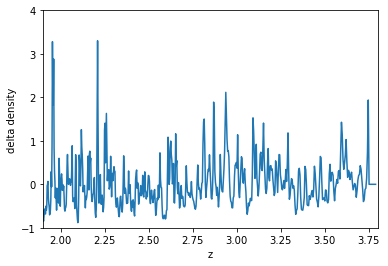

In [8]:
# plot delta for highest-z quasar skewer, vs redshift (above z=1.9)
plt.xlim(1.9,3.8)
plt.ylim(-1,4)
plt.xlabel('z')
plt.ylabel('delta density')
plt.plot(z,delta,label='real space')
#plt.plot(z-velocity,delta,label='redshift space')

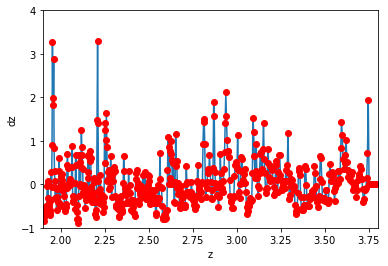

In [9]:
# plot delta for highest-z quasar skewer, vs redshift (above z=1.9)
plt.xlim(1.9,3.8)
plt.ylim(-1,4)
plt.xlabel('z')
plt.ylabel('dz')
plt.plot(z,velocity)
plt.plot(z,delta,'ro')
#plt.plot(z,delta,label='real space')
#plt.plot(z-velocity,delta,label='redshift space')